In [1]:
import json
from typing import NamedTuple
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
import pandas as pd

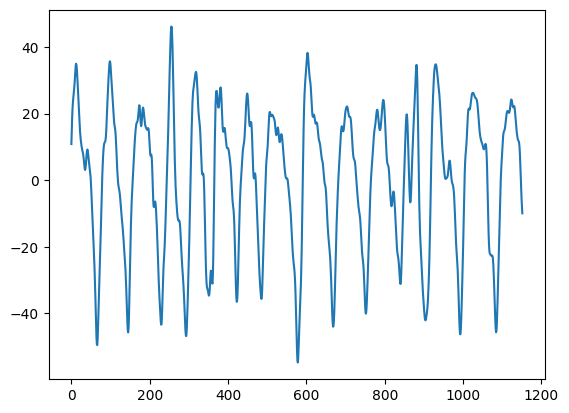

In [22]:
SAMPLING_RATE = 64 #Hz
df = pd.read_csv('./../../recordings/empatica/2min_rest/BVP.csv', skiprows=2, header=None)
bvp = df[0].values
bvp = np.array(bvp)
bvp = bvp[1000:2200]
bvp = bvp[: len(bvp) - len(bvp) % SAMPLING_RATE]
plt.plot(bvp)

In [8]:
def bandpass_filter(signal_data: np.ndarray, low_freq: float, high_freq: float, sampling_rate:int) -> np.ndarray: 
    """
    Filter frequencies out of [low_freq, high_freq].
        args:
            signal_data: 
                data in time domain
            low_freq:
                low frequency
            high_freq:
                high frequency
            sampling_rate:
                sampling rate
    """
    nyquist_freq = 0.5 * sampling_rate
    low = low_freq / nyquist_freq
    high = high_freq / nyquist_freq
    order = 4  # Filter order
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal_data)
    return filtered_signal

In [27]:
LOW_FREQ = 0.5 #Hz
HIGH_FREQ = 5 #Hz

def get_hr_from_bvp(bvp: np.ndarray) -> float:
    import matplotlib.pyplot as plt
    # plt.plot(bvp)
    filtered_bvp_signal = bandpass_filter(bvp, LOW_FREQ, HIGH_FREQ, sampling_rate=SAMPLING_RATE)

    from scipy.signal import correlate, find_peaks
    r = correlate(filtered_bvp_signal, filtered_bvp_signal)
    r = r[len(r)//2:]
    peaks,_ = find_peaks(r, prominence=r[0]/4)
    # plt.plot(r)
    # plt.scatter(peaks, r[peaks], color='r')
    # plt.show()
    return 60/((peaks[1]-peaks[0])/64)

In [29]:
# reshape bvp to 3 non-overlapping windows 6 seconds each
bvp_win = bvp.reshape((3 ,len(bvp)//3))
hr = [get_hr_from_bvp(bvp_win[i]) for i in range(3)]
print(hr)

[44.651162790697676, 45.1764705882353, 43.146067415730336]
